In [1]:
import numpy as np
from scipy import stats # numpy에 최빈값 함수가 없어 mode함수를 이용해 최빈값 구함

np.random.seed(0)

data = np.random.randint(0, 100, 10000)

mean = np.mean(data); print(f'평균값 : {mean.round(2)}')
median = np.median(data); print(f'중앙값 : {median}')
mode = stats.mode(data); print(f'최빈값 : {mode.mode[0]}, {mode.count[0]}')
# modeResult 타입은 mode와 count로 구성되어있음, 

평균값 : 49.17
중앙값 : 49.0
최빈값 : 3, 125


In [2]:
mode

ModeResult(mode=array([3]), count=array([125]))

In [3]:
import numpy as np
from statistics import variance, stdev  # variance : 분산, stdev : 표준편차

np.random.seed(0)

points = np.random.randint(0, 100, 20)

var = variance(points);
print(f'분산 : {var}')
std = stdev(points)
print(f'표준편차 : {np.round(std, 2)}')
range = np.max(points) - np.min(points)
print(f'범위 : {range}')

print('사분위수 :')

for val in [0, 25, 50, 75, 100]:
    quantile = np.percentile(points, val)
    print(f"{val}% => {quantile}")

q1, q3 = np.percentile(points, [25, 75])
print(f"IQR : {q3 - q1}")


분산 : 662
표준편차 : 25.73
범위 : 79
사분위수 :
0% => 9.0
25% => 42.75
50% => 64.5
75% => 84.0
100% => 88.0
IQR : 41.25


In [4]:
import numpy as np
from scipy import stats # numpy에 최빈값 함수가 없어 mode함수를 이용해 최빈값 구함

x_bar , mu , sigma , n = 196, 200, 5.3, 20

t_sample = (x_bar - mu) / (sigma / np.sqrt(float(n)))
print(f'검정통계량 : {np.round(t_sample, 2)}')

alpha = 0.05
t_alpha = stats.t.ppf(alpha, n-1)
print(f't-table로부터의 임계값: {np.round(t_alpha, 3)}')

p_val = stats.t.sf(np.abs(t_sample), n-1)
print(f"t-table의 아래쪽 꼬리 p 값: {np.round(p_val, 4)}")

검정통계량 : -3.38
t-table로부터의 임계값: -1.729
t-table의 아래쪽 꼬리 p 값: 0.0016


In [5]:
import numpy as np
from scipy import stats

x, mu, s = 75, 56, 13.6

z = (x - mu) / s
print(f"z-score:{np.round(z,2)}")

p_val = 1- stats.norm.cdf(z)
print(f'학생이{x}점 이상 받을 확률: {np.round(p_val*100, 2)}%')

z-score:1.4
학생이75점 이상 받을 확률: 8.12%


In [6]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(0)

smoke = ['안함', '가끔', '매일', '심함']
exercise = ['안함', '가끔', '매일']

data = {"smoke" : np.random.choice(smoke, size= 500),
        "exercise" : np.random.choice(exercise, size=500)}

df = pd.DataFrame(data)
df.head()

,smoke,exercise
0,안함,안함
1,심함,안함
2,가끔,매일
3,안함,가끔
4,심함,가끔


In [7]:
xtab = pd.crosstab(df.smoke, df.exercise)
xtab

exercise,가끔,매일,안함
smoke,,,
가끔,38,39,45
매일,34,44,33
심함,45,44,51
안함,47,41,39


In [8]:
contg = stats.chi2_contingency(observed=xtab)
p_val = np.round(contg[1], 3)
print(f"P-값: {p_val}")

P-값: 0.668


In [9]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(0)

data = (np.random.rand(30).round(2) * 10).reshape(-1, 3)
df = pd.DataFrame(data=data, columns=['A', 'B', 'C'])
df

,A,B,C
0,5.5,7.2,6.0
1,5.4,4.2,6.5
2,4.4,8.9,9.6
3,3.8,7.9,5.3
4,5.7,9.3,0.7
5,0.9,0.2,8.3
6,7.8,8.7,9.8
7,8.0,4.6,7.8
8,1.2,6.4,1.4
9,9.4,5.2,4.1


In [10]:
one_way_anova = stats.f_oneway(df.A, df.B, df.C)
print(f'통계량 : {np.round(one_way_anova[0], 2)}, p-value : {np.round(one_way_anova[1], 3)}')

통계량 : 0.34, p-value : 0.713


In [11]:
import numpy as np

rs = np.random.RandomState(10)
x = 10 * rs.rand(5)
y = 2 * x - 1 * rs.rand(5)

x.shape, y.shape

((5,), (5,))

In [12]:
x, y

(array([7.71320643, 0.20751949, 6.33648235, 7.48803883, 4.98507012]),
 array([15.20161622,  0.21697612, 11.91243399, 14.80696681,  9.88180043]))

In [13]:
X = x.reshape(-1, 1) # (행, 열) 열고정 1열
X.shape

(5, 1)

In [14]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
X = iris.drop("species", axis = 1)
X.shape

(150, 4)

In [17]:
y = iris["species"]
y.shape

(150,)

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [19]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [20]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
iris.frame

In [25]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [26]:
iris.data.shape

(150, 4)

In [27]:
iris.target.shape

(150,)

In [28]:
X = iris.data # X : 특징행렬
y = iris.target # y: 대상행렬
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [29]:
import numpy as np
import matplotlib.pyplot as plt
rs = np.random.RandomState(10)
x = 10* rs.rand(100) # 0~10 사이 100개의 랜덤값
y = 3 * x + 2 * rs.rand(100)

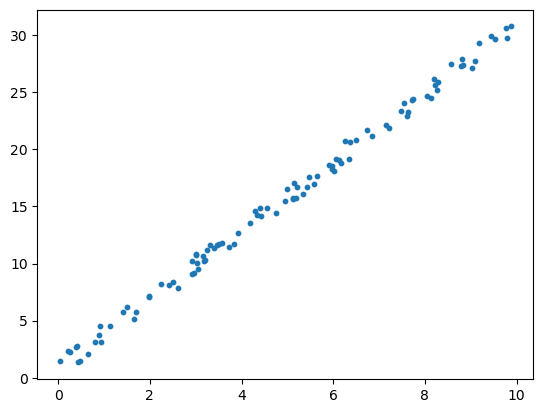

In [30]:
plt.scatter(x,y,s=10)
plt.show()

In [31]:
from sklearn.linear_model import  LinearRegression
regr = LinearRegression(fit_intercept=True)

In [32]:
X = x.reshape(-1, 1)
X.shape, y.shape

((100, 1), (100,))

In [33]:
regr.fit(X,y)

LinearRegression()

In [34]:
regr.coef_

array([2.9855087])

In [35]:
regr.intercept_

0.9878534341975662

In [36]:
x_new = np.linspace(-1, 11, num=100)
X_new = x_new.reshape(-1, 1)
X_new.shape

(100, 1)

In [37]:
y_pred = regr.predict(X_new)

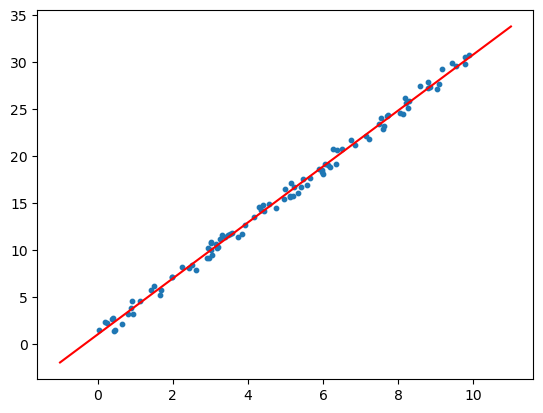

In [38]:
plt.plot(x_new, y_pred, c='red')
plt.scatter(x, y, s=10)
plt.show()

In [39]:
x_new

array([-1.        , -0.87878788, -0.75757576, -0.63636364, -0.51515152,
       -0.39393939, -0.27272727, -0.15151515, -0.03030303,  0.09090909,
        0.21212121,  0.33333333,  0.45454545,  0.57575758,  0.6969697 ,
        0.81818182,  0.93939394,  1.06060606,  1.18181818,  1.3030303 ,
        1.42424242,  1.54545455,  1.66666667,  1.78787879,  1.90909091,
        2.03030303,  2.15151515,  2.27272727,  2.39393939,  2.51515152,
        2.63636364,  2.75757576,  2.87878788,  3.        ,  3.12121212,
        3.24242424,  3.36363636,  3.48484848,  3.60606061,  3.72727273,
        3.84848485,  3.96969697,  4.09090909,  4.21212121,  4.33333333,
        4.45454545,  4.57575758,  4.6969697 ,  4.81818182,  4.93939394,
        5.06060606,  5.18181818,  5.3030303 ,  5.42424242,  5.54545455,
        5.66666667,  5.78787879,  5.90909091,  6.03030303,  6.15151515,
        6.27272727,  6.39393939,  6.51515152,  6.63636364,  6.75757576,
        6.87878788,  7.        ,  7.12121212,  7.24242424,  7.36

In [40]:
from sklearn.metrics import  mean_squared_error

rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

13.70823712248633